<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F

In [ ]:
from sklearn import datasets

A fully-connected 2-layer network with Relu non-linearity.

In [ ]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
   # self.activation_hidden = nn.ReLU(self.preactivation_hidden)
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
  #  self.activation_hidden = nn.ReLU(self.preactivation_out)

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = F.relu(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = F.relu(pre_output)
    return output

# Why is this code wrong? 
#Ok, By replacing nn.ReLU with F.relu it works.
#It remains to check that both network structures are correct.


In [ ]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [ ]:
iris = datasets.load_iris()

In [ ]:
type(iris['data'])

numpy.ndarray

In [ ]:
iris_data_torch = torch.from_numpy(iris.data)

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

This data is now ready to be feed into the neeural net.


In [ ]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

Now, we can train our neural net on this dataset.

In [ ]:
list(my_net.parameters()) #It contains weights and biases.

[Parameter containing:
 tensor([[-0.0548,  0.3455,  0.4643,  0.0593],
         [-0.0470,  0.0854, -0.2960,  0.0564],
         [-0.0679, -0.3587,  0.2166, -0.3548],
         [-0.4126, -0.3511, -0.1248,  0.4512],
         [-0.4377, -0.1925, -0.0476, -0.4453],
         [-0.3268, -0.3716, -0.4640, -0.4267],
         [ 0.2061,  0.3578, -0.1701,  0.4924],
         [ 0.0742,  0.2283, -0.3238,  0.1341],
         [ 0.1541,  0.2520, -0.2787,  0.0419],
         [ 0.4153,  0.1287, -0.3938, -0.2300]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0264, -0.0033,  0.4596,  0.0966,  0.2223,  0.0438, -0.4906, -0.1595,
          0.2367,  0.1609], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0803, -0.1943,  0.1737,  0.2967,  0.0295, -0.1198,  0.0273, -0.0797,
          -0.2777,  0.2971],
         [-0.0200, -0.0127,  0.0312, -0.2087, -0.1868, -0.0671,  0.2688,  0.2480,
           0.1554,  0.2987],
         [ 0.1571, -0.1995,  0.0285, -0.2683, -0.2505,  0.0789,  0.0174, -0.0873,
     

In [ ]:
#First, we train with unnormalized data.
epochs = range(10000)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr=1e-3)
iris_train = iris_data_torch.float()
iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
acc_list = []
loss_list = []
for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_labels_torch)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_labels_torch).float().mean()
   acc_list.append(accuracy)
   loss_list.append(iris_loss)

In [ ]:
predictions

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
        2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [ ]:
#Network weights for the trained neural network.
list(my_net.parameters()) 

[Parameter containing:
 tensor([[-0.1940, -0.0800, -0.1055,  0.0161],
         [-0.1973,  0.1230, -0.3030,  0.1955],
         [-0.2717,  0.4122, -0.0829, -0.3926],
         [ 0.1115,  1.3536, -0.6037, -1.2550],
         [-0.3526, -0.4167, -0.3070,  0.1551],
         [-0.3158, -0.2244, -0.3907,  0.3439],
         [-0.4366, -0.4142,  0.3629, -0.3536],
         [-0.5697,  0.4741, -0.5294, -0.9404],
         [-0.8458, -0.0630, -0.9767, -0.2744],
         [-0.1582,  0.0378,  0.0771, -0.0163]], requires_grad=True),
 Parameter containing:
 tensor([-3.0975e-01, -7.4935e-02, -3.8639e-01,  7.3626e-01,  4.2915e-04,
         -1.3054e-02,  1.7281e-01,  2.7261e-01, -1.7075e-01, -5.2517e-02],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0581,  0.2700, -0.0335,  1.4862,  0.3011, -0.3042,  0.2296,  0.2057,
           0.2261,  0.2488],
         [ 0.0093, -0.2570,  0.0215,  0.4130, -0.2484, -0.3035,  0.1727, -0.3045,
          -0.2127,  0.2307],
         [-0.2642,  0.1836, -0.1385, -1

Text(0.5, 1.0, 'iris dataset')

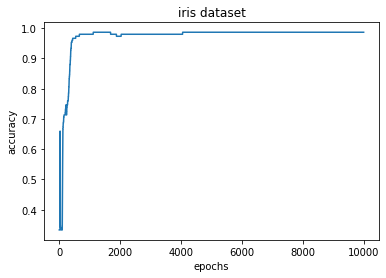

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

In [ ]:
accuracy

tensor(0.9867)

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***